# Using Spectroscopy to Study Galaxies

## What is a Spectrum?
Light, similar to sound, is energy that travels as a wave (a wave of electric and magnetic fields in the case of light). The *wavelength* of light just describes the distance between peaks in a traveling light wave. The figure below shows a wave with its wavelength labeled.

![figure1](images/wavelength_6.png)

It is rare for anything to emit light at just *one* wavelength, however. Almost everything that we see is made up of light at many different wavelengths. Let's imagine that we wanted to know how much light of each wavelength is being emitted by a light source, say the Sun. To accomplish this, we can take a *spectrum*, meaning that we split the light into its component colors or wavelengths. This is what a prism does when it makes a rainbow out of sunlight: it splits up light from the Sun into all of the visible colors from red to violet, as shown below. 

![figure2](images/prismcolors.png)

Similar to sunlight, when we collect the light from a star or a galaxy and spread it out, we can study how bright something is at each wavelength: a.k.a., its spectrum. Analyzing the spectrum of an object tells us a lot of information: its temperature, what it's made of, how fast it's moving, and more.

## How Do we Get so Much Information from a Spectrum?
When we split up the light coming from a light bulb (for example) and look at its spectrum, it looks like a smooth rainbow, like the top panel of the figure below, where the x-axis is wavelength in nanometers. But, if you take hydrogen gas, super heat it/shock into a glowing plasma, and take a spectrum of the glowing hydrogen, it will look like the bottom panel of the figure below, with light only showing up at very specific wavelengths.

![figure3](images/spectrum.png)

These features at specific wavelengths are called *emission lines*. Each chemical element gives off light at particular wavelengths when its atoms get excited (like in a hot plasma), so these lines act like a fingerprint that tells us which elements are present. You can see examples below of emission lines coming from other elements, acting as unique "fingerprints" for each element.

![figure4](images/element_spectra.png)

## What Produces Emission Lines in a Galaxy?
Hot plasma may not be common here on Earth, but it is quite common in galaxies! Emission lines in galaxies are mostly produced by clouds of gas and plasma that are being energized by nearby sources of energy, usually ultraviolet light, x-rays, or collisions. These gas clouds are part of the interstellar medium (ISM), which fills the space between stars. We will elaborate on this in the next section.

Young, hot stars can heat the surrounding hydrogen gas and cause it to glow, producing strong hydrogen emission lines.

Exploding stars (supernovae), stellar winds, and supermassive black holes (AGN) can also energize the gas and influence the shape of the spectrum.

## What is the Interstellar Medium (ISM)?
You may have heard that space is a vacuum, but this isn't completely true. The reason that people say this is because, compared to Earth's atmosphere, the matter in space is *extremely* diffuse. To give you an idea of how diffuse this gas is, Earth's atmosphere has roughly $10^{19}$ particles per cubic centimeter. In many regions of the ISM, you will typically find $10^2 - 10^4$ particles per cubic centimeter. In other words, the Earth's atmosphere can be up to **one hundred thousand trillion** times denser than the ISM! And yet, even though it is widely spread out, there is so much material in the ISM that it emits enormous amounts of light when it is energized.

The interstellar medium is made of gas (mostly hydrogen and helium) and dust that fills the space between stars in a galaxy, and it plays a very important role in galaxy evolution. New stars form out of this gas, and the deaths of stars return energy and elements back into the medium. When the gas in the ISM is heated or ionized, it produces *emission lines*, just like the ones shown in the images above.

## Redshift ($z$) and the Expanding Universe?
We have known since the 1920s that the universe is expanding, which means that distant galaxies appear to be moving away from us. When light from a distant galaxy is emitted, it travels towards the Earth through the expanding Universe, and this causes the light waves to become stretched out, like a slinky. This effect causes the entire spectrum to "shift" toward redder colors and is known as **redshift**. The more distant a galaxy is, the more that its light is "redshifted". You can see this effect in the image below. By measuring how much the light is redshifted, astronomers can determine how far away a galaxy is and learn about the history and expansion of the universe.

![figure5](images/Measuring_Distance_With_Redshift.jpg)

## Observed Wavelength and Redshift

When we observe a distant, "redshifted" galaxy's spectrum, we see that the wavelengths of its emission lines are at redder (larger) wavelengths compared to where they would appear in a laboratory. This **redshift** ($z$) is calculated by relating the **observed wavelength** $\lambda_{\text{obs}}$ to the **rest-frame (original/laboratory) wavelength** $\lambda_{\text{rest}}$ using the equation:

$$
\lambda_{\text{obs}} = \lambda_{\text{rest}} (1 + z)
$$

Below, we see an image showing how a galaxy's spectrum changes depending on its redshift, or how far away it is. See any emission lines that look familiar in the top panel? (*Hint: Look at the Hydrogen emission line spectrum in one of the images above.*)

![figure6](images/galaxy_redshift_illustration.png)

# The goal of this project:

Now that you know what redshift is and how it affects spectra, you're ready to apply that knowledge to real data.  

In this project, you'll measure the observed wavelength of an emission line in several galaxy spectra and match each one to its known redshift. Then, you'll perform a linear fit to determine the line's rest-frame wavelength and figure out which element it comes from!

---

# Important emission lines in galaxy spectra

> Coding learning goal: 
>*   Locate files and directories, and identify the corresponding paths
>*   Read and understand what a function does and how to use it
>*   Plot a spectrum

## Examine the spectrum of a galaxy!

Run the cell below to begin the project. This cell imports useful modules to help us analyze data in Python.

In [6]:
# Here, we import some helpful modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.table import Table
from astropy.io import fits
import pandas as pd
import os
import sys
from glob import glob
sys.path.append('./scripts/')
from helper_functions import *
plt.rcParams.update(pretty_plot_params)

## Locate the directory (folder) where the spectra are

Our first step in plotting and examining the spectrum of a galaxy is to tell Python *where* to find the files that contain the spectra. In other words, we have to define the **directory** where the files are stored. Edit the cell below to specify the *path* to the data directory. We will also define the path to a "figures" directory where we will save images.

In [13]:
# Define the data directory

# example: raw_data_dir = 'data/raw_spectra/'
raw_data_dir = 'data/'  # Where the spectra are stored
figure_dir = 'figures/'    # Where you want to save figures (images, plots, etc.)

<div class="alert alert-block alert-warning">
If you see <b>"FIXME"</b>, it means that you should edit or write that part of the code before running the cell.
</div>

## Open the files to access the spectra

Remember our discussion of FITS (Flexible Image Transport System) files, and how they are the standard in astronomy? FITS files can contain more than just images. They can contain informational *tables* too. The data that we will work with are contained within FITS files as tables, like the one shown below:

| wavelength | flux |
| --- | --- |
| 0.50 | 0.03 |
| 0.55 | 1.27 |
| 0.60 | 8.32 |
| 0.65 | 2.54 |
| ... | ...|

where **`wavelength`** is the wavelength of the spectrum, and **`flux`** is the brightness at each wavelength.

Let's try opening a FITS table to see how it looks for ourselves.

First, find the example galaxy spectrum in our data/spectra directory with the ID = `110` and enter the file name in the cell below.

In [14]:
# Type in the file name of the example galaxy spectrum with ID = 110
example_spectrum_filename = 'example_galaxy_spectrum.fits'

Next, look through the two functions that we define below. What do you think that they do? Write your answers below (For now, don't worry about the unfinished portions. We will come back to these and fix them):

1) `read_spectrum()`:
2) `plot_spectrum()`:

When you have finished, discuss together, and call over one of the volunteers to check your answers. Then, run the cell below containing the `read_spectrum()` function. Do not run the `plot_spectrum()` cell yet. Because it is not yet finished, it will return an error if you run the cell.

In [9]:
def read_spectrum(filename):
    """
    Reads a FITS file and returns the spectrum data as an Astropy Table.
    
    Parameters:
    filename (str): The path to the FITS file.
    
    Returns:
    astropy.table.Table: The spectrum data.
    """
    
    table = Table.read(filename)

    return table

In [10]:
# Pre-made function to plot a spectrum
def plot_spectrum(filename, wave_range=None, fig=None, ax=None):
    """
    Plots the spectrum from the given filename.

    Parameters:
        filename (str): Path to the spectrum file.
        wave_range (tuple, optional): (wave_min, wave_max) for x-axis limits.
        fig (matplotlib.figure.Figure, optional): Existing figure to use.
        ax (matplotlib.axes.Axes, optional): Existing axes to use.

    Returns:
        fig, ax: The figure and axis containing the plot.
    """
    table = read_spectrum(filename)

    ############################# Edit Here ##############################
    
    wave = table['wavelength']
    flux = table['flux']

    x_axis_label = r'Observed Wavelength ($\AA$)' # What are the units?
    y_axis_label = 'Flux'
    
    ######################################################################

    # Apply wavelength range if specified
    if wave_range is not None:
        wave_min, wave_max = wave_range

        # Create a mask to isolate the wavelength region
        mask = (wave >= wave_min) & (wave <= wave_max)

        # Apply the mask to the wavelength and flux arrays
        wave = wave[mask]
        flux = flux[mask]

    # Create figure and axis if not provided
    if ax is None or fig is None:
        fig, ax = plt.subplots(figsize=(8, 4))

    # Plot the spectrum
    ax.step(wave, flux, where='mid', color='black', lw=1)
    ax.set_xlabel(r'Wavelength [$\AA$]')
    ax.set_ylabel('Flux')

    if wave_range is not None:
        ax.set_xlim(wave_min, wave_max)

    return fig, ax


## View the table

Now that we know what is happening in the pre-defined functions, let's take a look at what's in the FITS table. Run the cell below to see the contents of our example spectrum file. What are the different column names?

In [ ]:
table = read_spectrum(raw_data_dir + example_spectrum_filename)
table

wavelength,flux,flux_err
Angstrom,erg / (Angstrom s cm2),erg / (Angstrom s cm2)
float64,float64,float64
2679.04788160715,8.556492124827827e-20,9.77190360657192e-20
2680.6384443687184,3.2376892308313696e-19,9.878359161215989e-20
2682.2290071302864,2.3836173050873986e-20,1.12975934342452e-19
2683.819569891854,1.080289437396795e-19,1.143031330047974e-19
2685.4101326534224,3.2532118250898526e-19,9.915801098967775e-20
2687.0006954149903,1.1322923915627413e-19,9.131162402552186e-20
2688.5912581765583,1.6882411400457897e-19,9.836597618736284e-20
2690.1818209381263,1.3055009737820381e-19,8.451199387561599e-20


## Edit `plot_spectrum()` above

We will now finish writing the `plot_spectrum()` function. Go ahead and edit the portions labeled "Edit Here" in order to make it work properly!

*Think: Which column in the table should go on which axis?*

Don't forget to run the `plot_spectrum()` cell before continuing!

## Plot a spectrum

Now that our function is working properly, run the cell below to plot the example spectrum.

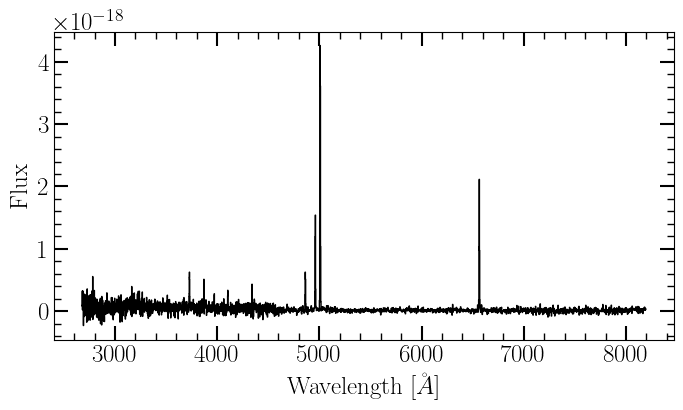

In [15]:
# Read in a spectrum and plot it!

# Plot the spectrum!
# First, let's define a figure and axis
fig, ax = plt.subplots(1,1, figsize=(8,4))

# Now, let's use the plot_spectrum() function we saw above
fig, ax = plot_spectrum(raw_data_dir+example_spectrum_filename, fig=fig, ax=ax)

Congratulations! You just opened a FITS table, loaded the spectrum of a galaxy, and plotted it onto a figure!

What kind of features can you see in the spectrum? Continuum emission? Emission lines? Absorption lines? 


## Zoom in on some emission lines

Emission lines act like fingerprints for chemicals and elements in galaxies --- once you find a pattern, you start spotting them in most other spectra. 

Let's zoom into an easily recognizable group of three bright emission lines around 500 nm (5000 Å). Run the cell below to plot just a portion of the spectrum. If the spectrum is not zoomed in enough or centered, try changing `min_wave` and `max_wave` to capture the three emission lines better.

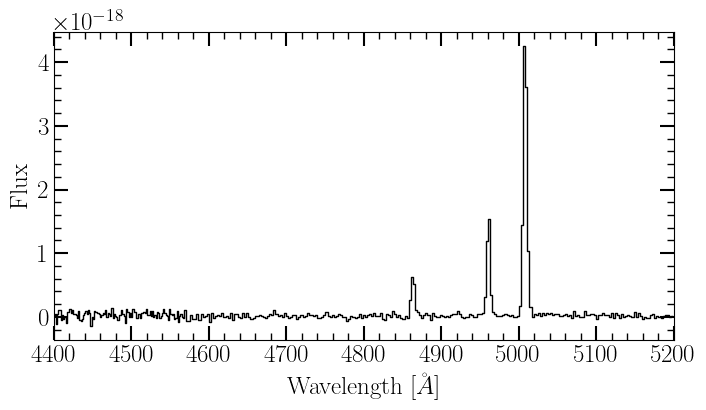

In [21]:
# Define the range of wavelengths to zoom in on
min_wave = 4400 #Angstroms  You should edit this 
max_wave = 5200 #Angstroms  You should edit this too

# Input the additional argument "wave_range" to plot_spectrum() 
# to zoom in on a specific wavelength range
fig, ax = plot_spectrum(raw_data_dir+example_spectrum_filename, ax=ax, wave_range=[min_wave, max_wave])

## Find the same group of emission lines in a different spectrum

Now, let's plot another spectrum. Find the second example spectrum in the data directory and read it in using the code in the cell below.

Can you find the same group of three emission lines in a new spectrum? Try zooming into the group of lines. Are they still at around 500nm?

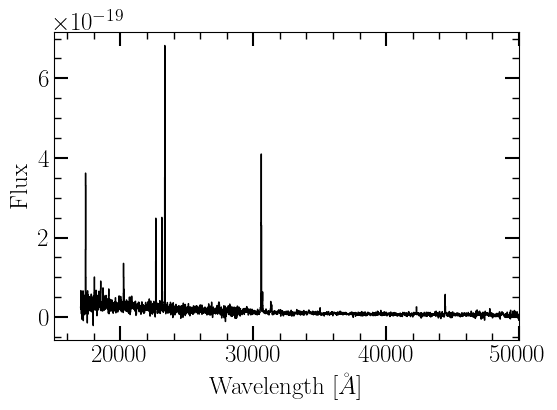

In [19]:
# Specify another file name 
example_spectrum_filename_2 = 'example_galaxy_spectrum2.fits'

# Define a new wavelength range
min_wave = 15000 #Angstroms
max_wave = 50000 #Angstroms

fig, ax = plt.subplots(1,1, figsize=(6,4))
fig, ax = plot_spectrum(raw_data_dir+example_spectrum_filename_2, fig=fig, ax=ax, wave_range=[min_wave, max_wave])

What is the approximate wavelength of the rightmost emission line in our recognizeable group of three? Note that this is not the wavelength you would see in a laboratory!

The emission lines of far-away galaxies are often redshifted away from what they would look like in a laboratory. Since the wavelength of an emission line of a redshifted galaxy isn't its true wavelength, we call it the ***"observed wavelength"***.

Take note of this rightmost emission line. We will be focusing on this line for the rest of the project!

***

# Using Python to find the wavelength of an emission line

> Coding learning goal: 
>*  Fit an emission line with a Gaussian profile
>*  Overlay a Gaussian curve on an emission line in a plot

While we can try to figure out the observed wavelength of emission lines by eye and hope for the best, that's not very scientific... Is the emission line exactly at one single wavelength?

### The Gaussian function

What we can do instead, is write some code to find the "center" of an emission line. The standard approach is to "fit" the emission line with a Gaussian function (sometimes called a Gaussian profile). A Gaussian profile is shown below:

![figure7](images/gaussian.png)

For our purposes, you can imagine that wavelength is on the x-axis and flux is on the y-axis in the image above. What exactly is this function? The equation that describes a Gaussian profile is:

$$G(x) = A \times {\rm exp} \left[ -\frac{(x-\mu)^2}{2\sigma^2} \right]$$

*Note: ${\rm exp}(x)$ is the same as $e^x$*

- $\mu$: The center of the Gaussian profile
- $\sigma$: The width of the Gaussian profile
- $A$: The amplitude (maximum height) of the Gaussian profile
- $x$: The wavelength of the spectrum (the x-axis).


The process of "fitting" involves changing the shape of this Gaussian function (the location of its center ($\mu$), its width ($\sigma$), and its height ($A$)) so that it matches or "fits" the emission line of interest. The image above shows a Gaussian centered at zero ($\mu = 0$), but we can modify the center to be any value.


The function `fit_gaussian()` helps us create the model Gaussian that we will use to fit the emission lines. After it figures out the best model, it tells us exactly where the emission line "center" ($\mu$) is.

Let's run the `fit_gaussian()` function on our first spectrum and see what it outputs. You can also find this function in the `helper_functions.py` script in the scripts directory. Edit the cell below as necessary and plot the first example spectrum. Make sure to zoom in on the rightmost emission line in that group of three! *Ensure no other lines are visible.*

In [ ]:
# Run fit_gaussian() on the first example spectrum

# Define a new wavelength range (good practice to re-set it here)
min_wave = FIXME #Angstrom
max_wave = FIXME #Angstrom

fig, ax = plt.subplots(1,1, figsize=(6,4))
fig, ax = plot_spectrum(raw_data_dir+example_spectrum_filename, fig=fig, ax=ax, wave_range=[min_wave, max_wave])

### Once you have zoomed in on the emission line of interest, and no other lines are visible in the spectrum, run the following cell to begin the fitting routine.

In [ ]:
fit, fit_err = fit_gaussian(raw_data_dir+example_spectrum_filename, wave_range=[min_wave, max_wave])

## Fit complete

The fit has now completed! And we have saved the fit results (our best-fitting Gaussian profile) into the variables `fit` and `fit_err`. We will take a look at the contents of `fit` before we plot it on top of our spectrum. Run the cell below, examine the output, and then run the following cell to plot the Gaussian.

In [ ]:
# Print out the best-fit parameters
print(f"Best-fit parameters for spectrum in {example_spectrum_filename}")
print(f"Amplitude: {fit[0]:.3e}") # :.3f and :.3e means print three decimal places
print(f"Center: {fit[1]:.3f}")
print(f"Width: {fit[2]:.3f}")
print(f"Offset: {fit[3]:.3e}")


In [ ]:
# Let's plot the spectrum and the best-fit Gaussian together

fig, ax = plt.subplots(1,1, figsize=(6,4))
fig, ax = plot_spectrum(raw_data_dir+example_spectrum_filename, fig=fig, ax=ax, wave_range=[min_wave, max_wave])

# Apply the gaussian function to the wavelength array
gaussian_wl = np.arange(4000, 6000, 0.01)
flux_fit = gaussian(gaussian_wl, *fit)  

# Note: *fit unpacks the fit array into individual parameters
# This is the same as gaussian(wave, fit[0], fit[1], fit[2], fit[3])

# Plot the best-fit Gaussian
ax.plot(gaussian_wl, flux_fit, color='red', lw=2, label='Best-fit Gaussian')
ax.set_title(f'Spectrum with Best-fit Gaussian for {example_spectrum_filename}')
ax.legend()
plt.show()

We will need to repeat this process of plotting Gaussian profile fits many times later. Turning this into a function will save us time later...

In [ ]:
def plot_gaussian_fit(filename, wave_range=None, fig=None, ax=None):
    """
    Plots the spectrum and the best-fit Gaussian for a given filename.

    Parameters:
        filename (str): Path to the spectrum file.
        wave_range (tuple, optional): (wave_min, wave_max) for x-axis limits.
        fig (matplotlib.figure.Figure, optional): Existing figure to use.
        ax (matplotlib.axes.Axes, optional): Existing axes to use.

    Returns:
        fig, ax: The figure and axis containing the plot.
    """
    # Fit the Gaussian to the spectrum
    fit, fit_err = fit_gaussian(filename, wave_range)
    
    # Read the spectrum data and create the fit curve
    table = read_spectrum(filename)
    gaussian_wl = np.arange(np.amin(table['wavelength']), np.amax(table['wavelength']), 0.01)
  
    flux_fit = gaussian(gaussian_wl, *fit)

    if ax is None or fig is None:
        fig, ax = plt.subplots(figsize=(6, 4))

    fig, ax = plot_spectrum(filename, wave_range=wave_range, fig=fig, ax=ax)
    ax.plot(gaussian_wl, flux_fit, color='red', lw=2, label='Best-fit Gaussian')
    ax.set_title(f'Spectrum with Best-fit Gaussian for {os.path.basename(filename)}')
    ax.legend()

    return fig, ax

What is the observed wavelength of the emission line?  

## Do the same process for the second spectrum

In our second example spectrum, find the exact same emission line (note, it may not be at the same wavelength!) and fit the line with a Gaussian profile.

In [ ]:
# Now, let's repeat the fitting for the second spectrum
FIXME
FIXME
FIXME



In [ ]:
FIXME
FIXME
FIXME
FIXME


In [ ]:
FIXME
FIXME
FIXME
FIXME


How different are the observed wavelengths of this emission line in spectrum 1 and spectrum 2? 

***

# Fitting emission lines in many spectra

Now that we've found the wavelength of an emission line in two spectra, let's do the same procedure for a whole bunch of spectra!

## Crop the spectra and save the wavelength ranges

> Coding learning goal:
>*  Read in filenames from a directory
>*  Create a pandas DataFrame to save filenames and corresponding info
>*  Save a list of information to a .csv file

As you saw in the last Gaussian fitting exercise, you don't need to use the whole spectrum when you're fitting an emission line. You just need a small portion (wavelength range) that includes the line you are interested in. In this next exercise, you will need to manually inspect each spectrum and determine the wavelength range to crop.

Our "spectra" directory contains 55 spectra, but let's just examine the first ten. Edit the cell below to accomplish this.

In [ ]:
# Load in 10 spectra
number_of_spectra_to_load = 10 # Edit here

raw_spectra_dir = 'data/spectra/'

# Use os.listdir to get the filenames
filenames_arr = os.listdir(raw_spectra_dir)
# Filter the filenames to only include .fits files
filenames_arr = [fn for fn in filenames_arr if fn.endswith('.fits')]
# Limit to the first 10 filenames
ten_filenames_arr = filenames_arr[:number_of_spectra_to_load]

Now that we have a list of the 10 spectra, let's display them one at a time by changing `file_no`, running the cell, and saving a wavelength range for each spectrum in the `wave_range_arr` array. Remember to choose a wavelength range around the same emission line as before in every spectrum.

`wave_range_arr` will print as you go to keep track of your progress.

*Hint: A good starting point for `min_wave` and `max_wave` if nothnig shows up is 20,000 and 50,000*

In [ ]:
file_no = 0    # Change this number from 0 to 9

# Show the full spectrum
spectrum_filename = ten_filenames_arr[file_no]

# Define a new wavelength range
min_wave = FIXME #nm
max_wave = FIXME #nm

fig, ax = plt.subplots(1,1, figsize=(6,4))
fig, ax = plot_spectrum(raw_spectra_dir+spectrum_filename, fig=fig, ax=ax, wave_range=[min_wave, max_wave])

# Save the wavelength ranges to wave_range_arr
try:
    s = np.sum(wave_range_arr)
except:
    wave_range_arr = np.zeros((len(ten_filenames_arr), 2))
    
wave_range_arr[file_no] = [min_wave, max_wave]

After filling `wave_range_arr`, we can save the `min_wave` and `max_wave` with the corresponding filename. 

In [ ]:
# Let's check what the wave_range_arr looks like
print("Wave range array:")
print(wave_range_arr)

In [ ]:
# Save filename and wave_range_arr into a .csv file

# Create a pandas DataFrame to store the filenames and wave ranges
df = pd.DataFrame({
    'filename': ten_filenames_arr,
    'min_wave': wave_range_arr[:, 0],
    'max_wave': wave_range_arr[:, 1]
})

# Save the DataFrame to a CSV file
output_filename = 'waverange.csv'
df.to_csv(output_filename, index=False)
# Print the DataFrame to check
print(df)

Just to save you some time, we helped you crop about 50 other spectra! Let's load them in and add them to the file you created above...

In [ ]:
# Load in the premade waverange.csv file
premade_waverange_filename = 'data/premade_waverange.csv'

# Read the CSV file into a pandas DataFrame (df)
premade_df = pd.read_csv(premade_waverange_filename)
# Remove the rows that contain the same filename as the original df
cropped_premade_df = premade_df[~premade_df['filename'].isin(ten_filenames_arr)]

# Combine the two DataFrames
combined_df = pd.concat([df, cropped_premade_df], ignore_index=True)
# Save the combined DataFrame to a new CSV file
combined_output_filename = 'combined_waverange.csv'
combined_df.to_csv('data/'+combined_output_filename, index=False)

***

## For Loop to apply the procedure on many spectra

> Coding learning goal: 
>*  Write for loops to apply a procedure to many files
>*  Append data to a list

Now that we have 55 spectra, we wouldn't want to manually change `file_no` 55 times to perform our Gaussian fitting on each spectrum. Let us use a for loop to make the computer do the repetitious work for us!

First, run the cell below to read in the DataFrame and display the contents so that we know what it looks like.

In [ ]:
# Before doing anything, we need to read in the big list of filenames and wavelength ranges
combined_output_filename = 'data/combined_waverange.csv'
combined_df = pd.read_csv(combined_output_filename)

combined_df

In [ ]:
# Load the filenames and wavelength ranges into arrays
# Replace 'FIXME_column_name' with the actual column names from your DataFrame
df_filename_arr = combined_df['filename']
df_min_wave_arr = combined_df['min_wave']
df_max_wave_arr = combined_df['max_wave']

### Loop through the spectra

We are now ready to run our loop on all of the spectra! Run the cell below and let the fitting code run its course. It will plot every ten spectra just so you can see. If you would like to modify this, edit the `plot_every_N_fits` variable.

In [ ]:
# First, initialize an empty list to store the fitted line centers
filenames_arr = []
fitted_centers = []
fitted_centers_err = []

plot_every_N_fits = 10

# Now, create a For Loop to go through each row
for row_idx in range(len(df_filename_arr)):

    # Get the filename and waveranges for a specific galaxy
    spectrum_filename = df_filename_arr[row_idx]
    min_wave = df_min_wave_arr[row_idx]
    max_wave = df_max_wave_arr[row_idx]
    wave_range = [min_wave, max_wave]

    print(spectrum_filename, min_wave, max_wave)

    # Fit a Gaussian to the spectrum
    try:
        fit, fit_err = fit_gaussian(raw_spectra_dir+spectrum_filename, wave_range=wave_range)
    except ValueError:
        continue

    # We want the line center, which is index 1
    center = fit[1]
    center_err = fit_err[1]

    # Add this info into our empty lists
    filenames_arr.append(spectrum_filename)
    fitted_centers.append(center)
    fitted_centers_err.append(center_err)

    # Just to make sure the code is running correcting in general,
    # we can display a few of the fitted Gaussians.
    # Let's do this for every N spectra (default, N=10):
    if row_idx%plot_every_N_fits == 0:
        fig, ax = plt.subplots(figsize=(3,3))
        fig, ax = plot_gaussian_fit(raw_spectra_dir+spectrum_filename, wave_range=wave_range, fig=fig, ax=ax)
    
    
# Turn the lists into numpy arrays
filenames_arr = np.array(filenames_arr)
fitted_centers = np.array(fitted_centers)
fitted_centers_err = np.array(fitted_centers_err)

## Fitting complete

Now that the Gaussian profile fitting has completed for all 55 spectra, we will save the results to a csv file. Specifically, we are saving the file name for each spectrum, the best-fitting center ($\mu$) for our selected emission line, and the uncertainty on our estimate of $\mu$.

In [ ]:
# Save the arrays to the combined output .csv file

# Make a new dataframe with the filename, fitted_centers, and fitted_centers_err
fit_df = pd.DataFrame({
    'filename': filenames_arr,
    'fitted_centers': fitted_centers,
    'fitted_centers_err': fitted_centers_err,
})

fit_filename = 'fitted_centers.csv'
fit_df.to_csv(fit_filename, index=False)

***

# Adding redshift information to our catalog

> Coding learning goal:
>*  Read in a .csv file as a pandas DataFrame, and merge with an existing DataFrame

Astronomers have previously observed these galaxies and figured out their redshifts. These values are recorded in the file `redshift_catalog.csv`. Run the cell below to read in the redshifts and add them to your table with filenames and fitted line centers.

Edit the cell below to merge the redshift catalog with our existing `fit_df` DataFrame.

In [ ]:
redshift_catalog_filename = 'data/redshift_catalog.csv'

# Read the CSV file into a pandas DataFrame
redshift_catalog_df = pd.read_csv(redshift_catalog_filename)

# Merge the fitted centers with the redshift catalog
######################### Edit Here ############################

merged_df = pd.merge(fit_df, redshift_catalog_df, on='filename', how='outer')
merged_output_filename = 'redshift_fitted_center_catalog.csv'

################################################################

# Save the merged DataFrame to a new CSV file
merged_df.to_csv(merged_output_filename, index=False)

***

# Plotting our results: emission line wavelength vs. redshift

> Coding learning goal:
>*  Plot data points
>*  Fit a line to data points and plot the line

Now that we have a list of observed emission line centers and corresponding redshifts, we can demonstrate how wavelengths vary with redshift. First, we need to create an *observed wavelength vs. redshift* plot.

## Observed wavelength vs. redshift

What data should we have as the x-axis and y-axis? Examine the merged DataFrame, and edit the cell below to populate the arrays with the correct columns from the DataFrame. After making edits, run the cell, and a plot will be generated below.

In [ ]:
merged_df = pd.read_csv(merged_output_filename)

# Populate a redshift array (x)
redshift_arr = merged_df['z'].values

# Populate an observed wavelength array (y)
observed_wave_arr = merged_df['fitted_center'].values

# Populate an error array (y_err)
observed_wave_err_arr = merged_df['fitted_center_err'].values

redshift_arr = redshift_arr[~np.isnan(observed_wave_arr)]
observed_wave_err_arr = observed_wave_err_arr[~np.isnan(observed_wave_arr)]
observed_wave_arr = observed_wave_arr[~np.isnan(observed_wave_arr)]

# Plot the data with error bars
fig, ax = plt.subplots(figsize=(6, 5))

ax.errorbar(redshift_arr, observed_wave_arr, yerr=observed_wave_err_arr, fmt='o', color='black', ecolor='lightgray', elinewidth=1, capsize=3)
ax.set_xlabel('Redshift')
ax.set_ylabel(r'Observed Wavelength ($\AA$)')
ax.set_title('Observed Wavelength vs. Redshift')


## Fit a model to the data

Remember our discussion of fitting with Gaussian profiles? We will be performing another fit, this time with a straight line through our data points. Recall that the equation of a line is<br>
$y = m \times x + b$<br>
where $m$ is the slope and $b$ is the y-intercept.<p>

Let's make this equation a little clearer by labeling $y$ as the observed wavelength $\lambda_{\mathrm{obs}}$ and $x$ as the redshift $z$:<br>
$\lambda_{\mathrm{obs}} = m \times z + b $ 

In the cell below, we have an incomplete function for a straight line. Edit the function so that it returns the equation of a straight line.

In [ ]:
# Define the equation

def straight_line(z, m, b):
    lambda_obs = m*z + b
    return lambda_obs

## Fit the linear model to the data

Now that we have our linear model relating redshift ($z$) and observed wavelength ($\lambda_{obs}$), we will perform a fit to the data and inspect the output slope and intercept. Run the cell below to inspect the output fit results.

What do you notice about $m$ and $b$? Write your answer below:

- 

In [ ]:
# Use scipy.optimize.curve_fit() to fit the data

fit, cov = curve_fit(straight_line, redshift_arr, observed_wave_arr)

# Extract the slope and intercept from the fit parameters
slope = fit[0]
intercept = fit[1]

# Get the fit errors
err = np.sqrt(np.diag(cov))
slope_err = err[0]
intercept_err = err[1]

# Print the fit parameters and errors
print(f"Slope (m): {slope:.3f} ± {slope_err:.3f}")
print(f"Intercept (b): {intercept:.3f} ± {intercept_err:.3f}")

## Plot our best-fit line

To see if these results look reasonable, let's plot the best-fitting line over the data. Does the line look like it matches the data well? Run the cell below to see.

In [ ]:
# Get the fitted line values
fitted_line = straight_line(redshift_arr, slope, intercept)

# Plot data and overlay best-fit
fig, ax = plt.subplots(figsize=(6, 5))

ax.errorbar(redshift_arr, observed_wave_arr, yerr=observed_wave_err_arr, fmt='o', color='black', ecolor='lightgray', elinewidth=1, capsize=3)
ax.plot(redshift_arr, fitted_line, color='red', lw=2, label='Best-fit Line')
ax.text(0.05, 0.95, f'Slope: {slope:.3f} ± {slope_err:.3f}\nIntercept: {intercept:.3f} ± {intercept_err:.3f}',
        transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

ax.set_xlabel('Redshift')
ax.set_ylabel(r'Observed Wavelength ($\AA$)')
ax.set_title('Observed Wavelength vs. Redshift')
ax.legend(loc='lower right')

fig.savefig(figure_dir+'redshift_vs_observed_wavelength.png', dpi=300)

# What is the rest wavelength of this emission line?

Call over one of the volunteers to verify that the linear fit looks reasonable.

If the fit looks reasonable, then we have all that we need to estimate the *true* or "rest" wavelength of the emission line that we are interested in. The equation that relates the observed wavelength to the rest wavelength and the redshift is:<br>
$$\lambda_{\mathrm{obs}} = \lambda_{\mathrm{rest}} \times (1+z)$$

From our linear fit, we also have the following equation for the observed wavelength:
$$\lambda_{\mathrm{obs}} = m \times z + b $$

What do $m$ and $b$ correspond to? You may have noticed that they are roughly the same, so you can rewrite the equation above as
$$\lambda_{\mathrm{obs}} \approx m \times z + m $$

Combine the two equations so that you can express $\lambda_{\mathrm{rest}}$ in terms of $m$.

What is the rest wavelength $\lambda_{\mathrm{rest}}$ of our emission line?

Write your answer below:

In [ ]:
# Bonus: Write code below that takes the average of m and b to get a better answer.

## Comparing with known emission line wavelenghts

Now that you have measured the rest wavelength of our mystery emission line, compare your answer to the table below. What is the name of this emission line? Which element is this emission line coming from?

| Emission line name | Element | $\rm \lambda_{rest}\ [Å]$ |
| --- | --- | --- |
| $\rm [S\thinspace{II}]\lambda 6733$ | sulfur | 6732.67 |
| $\rm [S\thinspace{II}]\lambda 6718$ | sulfur | 6718.29 |
| H$\alpha$ | hydrogen | 6564.61 |
| He$\thinspace$I | helium | 5877.25 |
|$\rm [O\thinspace{III}]\lambda 5008$ | oxygen | 5008.240 |
|$\rm [O\thinspace{III}]\lambda 4960$ | oxygen | 4960.295 |
| H$\beta$ | hydrogen | 4862.68 |
| H$\gamma$ | hydrogen | 4341.68 |
| $\rm [O\thinspace{II}]\lambda \lambda 3727,3730$ | oxygen | 3728.4835 |

<div class="alert alert-block alert-success">
<b>Congratulations!</b><p>
You just finished this redshift project. You should now have some experience with:
<ul>
    <li>Locating files/directories and accessing them via their paths</li>
    <li>Reading function definitions and understanding how to use them</li>
    <li>Plotting a spectrum and overlaying fitted curves</li>
    <li>Loading data from .csv files and saving data to them</li>
    <li>Using pandas DataFrame to manipulate large lists</li>
    <li>Fitting models to data (Gaussians and straight lines)</li>
    <li>Writing For Loops to perform the same analysis to a large set of data</li>
    <li>Comparing results with physical equations</li>
</div>

# Things to include in your presentation

Instrument and data:
*   All the spectra you saw were taken by the James Webb Space Telescope (JWST), specifically the instrument called NIRSpec. What is so special about them? Is this telescope new? How far away is it from Earth?

Background info about galaxies and redshifting:
*   Why are the spectra of some galaxies redshifted? What determines how redshifted a galaxy is?
*   What does a typical galaxy spectrum look like? What features are there?

What you did in this project:
*   What was the goal of this project? What were the main analysis steps you performed?
*   Show some of the plots you made!
*   What is the emission line you found here? 
*   What chemical element produces this line? Is it an important element?